Bank Campaign Marketing Insights (EDA)

In [1]:
# Importing Libraries

In [ ]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# Connect to SQLite database

In [7]:
conn = sqlite3.connect('bank_marketing.db')  # Database file
cursor = conn.cursor()

In [9]:
# Load the data from the CSV to a SQL Table

In [33]:
cursor.execute('''
CREATE TABLE bank_marketing_t (
    age INT,
    job VARCHAR(50),
    marital VARCHAR(50),
    education VARCHAR(50),
    duration INT,
    campaign INT,
    previous INT,
    poutcome VARCHAR(50),
    y VARCHAR(10)
)
''')

In [13]:
df = pd.read_csv('/Users/rimona/Downloads/archive (2)/bank-additional-full.csv', delimiter=';')

In [47]:
df

,age,job,marital,education,duration,campaign,previous,poutcome,y
0,56,housemaid,married,basic.4y,261,1,0,nonexistent,no
1,57,services,married,high.school,149,1,0,nonexistent,no
2,37,services,married,high.school,226,1,0,nonexistent,no
3,40,admin.,married,basic.6y,151,1,0,nonexistent,no
4,56,services,married,high.school,307,1,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,334,1,0,nonexistent,yes
41184,46,blue-collar,married,professional.course,383,1,0,nonexistent,no
41185,56,retired,married,university.degree,189,2,0,nonexistent,no
41186,44,technician,married,professional.course,442,1,0,nonexistent,yes


In [17]:
# Data Cleaning

(41188, 21)

In [19]:
# Dropped irrelevant collumns for EDA 

In [21]:
columns_to_keep = ['age', 'job', 'marital', 'education', 'duration', 'campaign', 'previous', 'poutcome', 'y']

# Drop all other columns
df = df[columns_to_keep]

In [43]:
# View data types
print(df.dtypes)

age           int64
job          object
marital      object
education    object
duration      int64
campaign      int64
previous      int64
poutcome     object
y            object
dtype: object


In [ ]:
# Changing Objects to Category data due to lack on unique values, more efficient for memory storage

In [49]:
df['job'] = df['job'].astype('category')
df['marital'] = df['marital'].astype('category')
df['education'] = df['education'].astype('category')
df['poutcome'] = df['poutcome'].astype('category')
df['y'] = df['y'].astype('category')

In [53]:
# View updated data types
print(df.dtypes)

age             int64
job          category
marital      category
education    category
duration        int64
campaign        int64
previous        int64
poutcome     category
y            category
dtype: object


In [ ]:
# Checking for Nulls in the data set

In [57]:
null_val = df.isnull().sum()

# Display the count of null values from each column
print(null_val)

age          0
job          0
marital      0
education    0
duration     0
campaign     0
previous     0
poutcome     0
y            0
dtype: int64


In [ ]:
# Append to the existing table

In [59]:
# Insert data from the DataFrame 'df' into the existing empty SQL table 'bank_marketing_t'
# The column names in 'df' must match the table's column names
try:
        df.to_sql('bank_marketing_t', conn, if_exists='append', index=False)  
        print("Success: Data inserted ")
except Exception as e:
        print("Error: ", e)

Success: Data inserted 


In [ ]:
# Analysis!
# Demographic Analysis

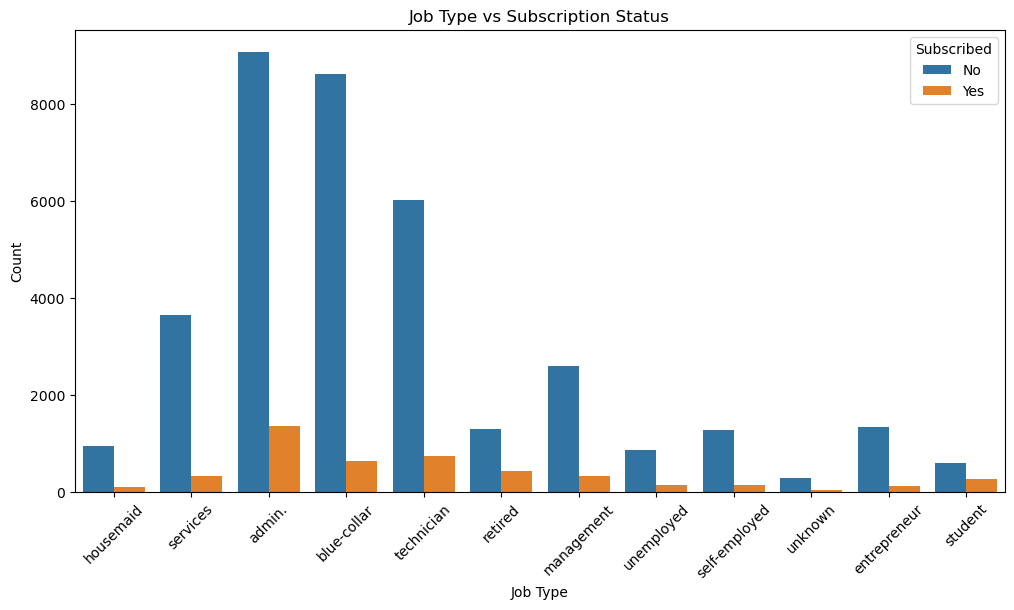

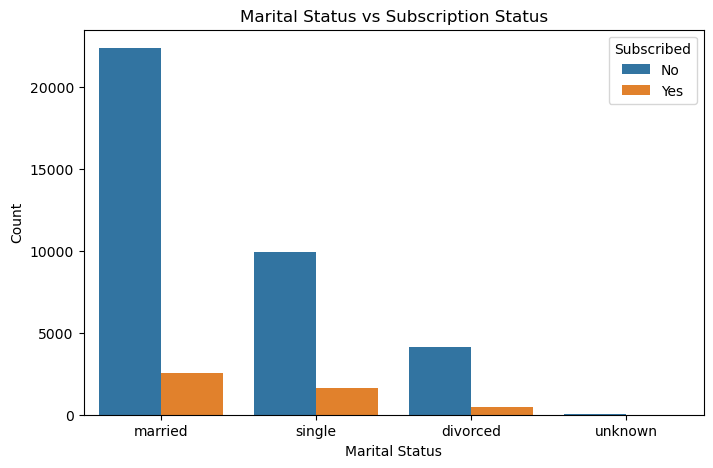

In [97]:
# Load demographic data
query = "SELECT age, job, marital, education, y FROM bank_marketing_t"
df_d = pd.read_sql(query, conn)

# Count plot for job type
plt.figure(figsize=(12, 6))
sns.countplot(x='job', hue='y', data=df_demo)
plt.title('Job Type vs Subscription Status')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Subscribed', labels=['No', 'Yes'])
plt.show()

# Count plot for marital status
plt.figure(figsize=(8, 5))
sns.countplot(x='marital', hue='y', data=df_demo)
plt.title('Marital Status vs Subscription Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Subscribed', labels=['No', 'Yes'])
plt.show()


In [ ]:
# Call Duration Box Plot

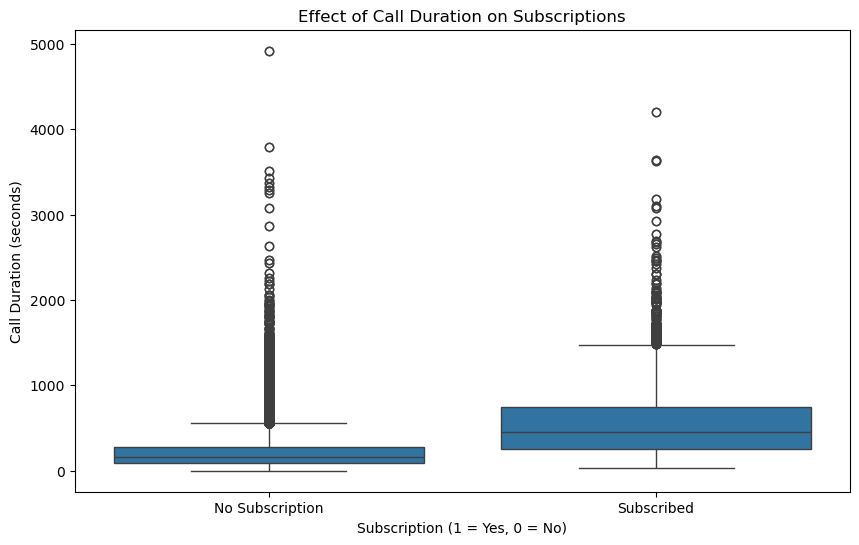

y
0    220.844807
1    553.191164
Name: duration, dtype: float64


In [29]:
# Load the data from the SQL table
query = "SELECT duration, y FROM bank_marketing_t"
df_duration = pd.read_sql(query, conn)

# Convert 'y' to a categorical variable for better plotting
df_duration['y'] = df_duration['y'].map({'yes': 1, 'no': 0})

# Create a box plot to analyze the effect of call duration on subscriptions
plt.figure(figsize=(10, 6))
sns.boxplot(x='y', y='duration', data=df_duration)
plt.title('Effect of Call Duration on Subscriptions')
plt.xlabel('Subscription (1 = Yes, 0 = No)')
plt.ylabel('Call Duration (seconds)')
plt.xticks([0, 1], ['No Subscription', 'Subscribed'])
plt.show()

# Calculate mean duration by subscription status
mean_duration = df_duration.groupby('y')['duration'].mean()
print(mean_duration)